In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot # Comment this and the following line if jupyter themes is not installed
# jtplot.style()

In [2]:
# Starting connection with the database in postgreSQL
conn = psycopg2.connect("host=localhost dbname={} user=postgres password=password".format("Savings_Behaviour"))
cur = conn.cursor()

In [3]:
projects = pd.read_sql('''SELECT catalog_name as project, 
    SUM(project_total) AS goal_sum,
    AVG(project_total) AS average_goal,
    ROUND((SUM(project_total) / SUM(SUM(project_total)) OVER ()) * 100, 2) AS "% of total", 
    COUNT(*) AS project_num, 
    ROUND((COUNT(*) / SUM(COUNT(*)) OVER ()) * 100, 2) AS "% of projects" 
    FROM test_projects, catalog_table
    WHERE project_category_id = catalog_id AND project_total < 1000000000 --1000M
    GROUP BY catalog_name
    ORDER BY AVG(project_total) DESC''', conn)
projects

,project,goal_sum,average_goal,% of total,project_num,% of projects
0,Hogar,1.883158e+08,83807.674379,12.34,2247,5.58
1,Vehiculo,2.185196e+08,53427.778178,14.32,4090,10.16
2,Solo ahorrar,7.531415e+08,38255.778445,49.36,19687,48.92
3,Otro,5.822686e+07,32583.578959,3.82,1787,4.44
4,Viajar,1.626520e+08,26699.279381,10.66,6092,15.14
5,Deudas,6.362482e+07,23391.477882,4.17,2720,6.76
6,Comprar algo,8.118372e+07,22445.043237,5.32,3617,8.99


Goal amount distribution by project category

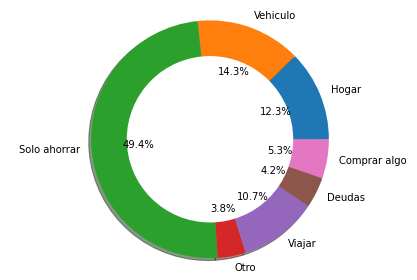

In [20]:
fig1, ax1 = plt.subplots()
ax1.pie(projects['goal_sum'].tolist(), labels = projects['project'].tolist(), autopct = '%1.1f%%',
        shadow=True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Average goal by project category

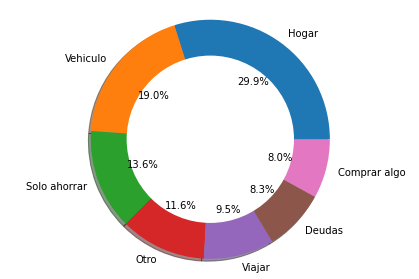

In [21]:
fig1, ax1 = plt.subplots()
ax1.pie(projects['average_goal'].tolist(), labels = projects['project'].tolist(), autopct = '%1.1f%%',
        shadow=True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [9]:
rules = pd.read_sql('''SELECT catalog_name as rule, 
        COUNT(*) AS subs, ROUND((COUNT(*) / SUM(COUNT(*)) OVER ()) * 100, 2) AS "% of subs"
        FROM test_rules, catalog_table
        WHERE rule_type_id = catalog_id
        GROUP BY  catalog_name
        ORDER BY COUNT(*) DESC''',
        conn)
rules

,rule,subs,% of subs
0,Monto fijo,28487,41.74
1,% de mi sueldo,11807,17.30
2,Redondear,10511,15.40
3,Desafio 52 semanas,10321,15.12
4,Placer culpable,5591,8.19
5,Santander TAP,1486,2.18
6,Pasion Futbolera,51,0.07


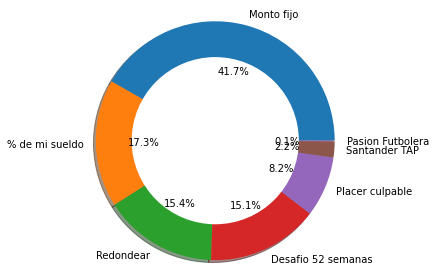

In [19]:
fig1, ax1 = plt.subplots()
ax1.pie(rules['subs'].tolist(), labels = rules['rule'].tolist(), autopct = '%1.1f%%',
        shadow=True)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [7]:
transactions = pd.read_sql('''SELECT t_date, SUM(amount) FROM transactions
        GROUP BY t_date ORDER BY t_date ASC''', conn, index_col = 't_date')
transactions.head()

,sum
t_date,
2019-09-21,-1530.0
2019-10-05,-811.6
2019-10-11,-2095.0
2019-10-14,-407.8
2019-10-25,-485.0


<AxesSubplot:title={'center':'Temporalidad de las transacciones'}, xlabel='Fecha', ylabel='Monto total (MXN)'>

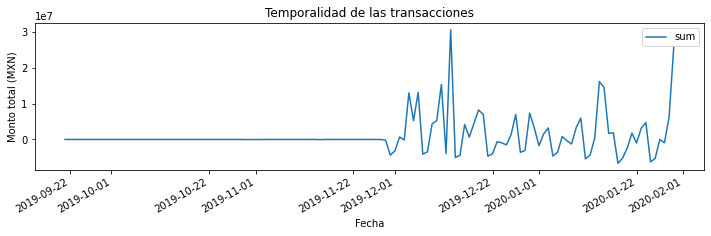

In [29]:
transactions.plot(figsize = (12,3), title = 'Temporalidad de las transacciones', xlabel = 'Fecha', ylabel = 'Monto total (MXN)', legend = 'false')